# <font size="5">Part 1: - Data aquare and Basic Python.</font>

In [242]:
from zipfile import ZipFile
from urllib.request import urlopen   
import pandas as pd
import os
from colorama import Fore

from datetime import datetime
import numpy as np

import backtrader as bt
import backtrader.analyzers as btanalyzers

import matplotlib.pyplot as plt
%matplotlib inline

In [243]:
#Binance data URL and dates

base_url='https://data.binance.vision/data/spot/daily/trades/'
company='BTCUSDT'
date=['2022-03-01', '2022-03-02', '2022-03-03']

In [38]:
#Download the data for require dates and save them in local directory

for i in range(len(date)):
    
    URL=\
        base_url+company+'/BTCUSDT-trades-'+date[i]+'.zip'

    # open and save the zip file onto computer
    url = urlopen(URL)
    output = open('trade_data_{}.zip'.format(date[i]), 'wb')    # note the flag:  "wb"        
    output.write(url.read())
    output.close()
    print(Fore.BLACK+'File for company code',Fore.BLUE+company,Fore.BLACK+'for date',Fore.BLUE+date[i],Fore.BLACK+'downloaded as',Fore.RED+'trade_data_{}.zip'.format(date[i]))

In [244]:
#open and merge all files into single dataframe

Price_data=pd.DataFrame()
for i in range(len(date)):
    df = pd.read_csv('trade_data_{}.zip'.format(date[i]),header=None)
    Price_data=pd.concat([Price_data,df],axis=0)
    
  

In [245]:
Price_data.head()

,0,1,2,3,4,5,6
0,1274557543,43160.00,0.00056,24.169600,1646092800000,True,True
1,1274557544,43160.01,0.00052,22.443205,1646092800003,False,True
2,1274557545,43160.01,0.00182,78.551218,1646092800004,False,True
3,1274557546,43160.01,0.00631,272.339663,1646092800005,False,True
4,1274557547,43160.00,0.00229,98.836400,1646092800006,True,True


In [246]:
print(Price_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809322 entries, 0 to 1289319
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       int64  
 1   1       float64
 2   2       float64
 3   3       float64
 4   4       int64  
 5   5       bool   
 6   6       bool   
dtypes: bool(2), float64(3), int64(2)
memory usage: 229.3 MB
None


In [247]:
#Give column names to dataframe
Price_data=Price_data[[1,2,3,4]]
Price_data.columns=['Traded Price', 'Traded Size', 'Traded Notional', 'Timestamp']
Price_data.head()

,Traded Price,Traded Size,Traded Notional,Timestamp
0,43160.00,0.00056,24.169600,1646092800000
1,43160.01,0.00052,22.443205,1646092800003
2,43160.01,0.00182,78.551218,1646092800004
3,43160.01,0.00631,272.339663,1646092800005
4,43160.00,0.00229,98.836400,1646092800006


In [248]:
Price_data.describe().mean()

Traded Price       6.340181e+05
Traded Size        6.011777e+05
Traded Notional    1.129714e+06
Timestamp          1.234671e+12
dtype: float64

In [249]:
#Add new column of datetime from unix time
Price_data['Time']=pd.to_datetime(Price_data['Timestamp']/1000,unit='s')

# <font size="5">Part 2: - Simple Forward Looking Market Making Strategy</font>

In [250]:
Price_data.head()

,Traded Price,Traded Size,Traded Notional,Timestamp,Time
0,43160.00,0.00056,24.169600,1646092800000,2022-03-01 00:00:00.000000000
1,43160.01,0.00052,22.443205,1646092800003,2022-03-01 00:00:00.003000064
2,43160.01,0.00182,78.551218,1646092800004,2022-03-01 00:00:00.004000000
3,43160.01,0.00631,272.339663,1646092800005,2022-03-01 00:00:00.005000192
4,43160.00,0.00229,98.836400,1646092800006,2022-03-01 00:00:00.006000128


In [251]:
#Set date as index of dataframe
Price_data=Price_data.set_index('Time')
Price_data

,Traded Price,Traded Size,Traded Notional,Timestamp
Time,,,,
2022-03-01 00:00:00.000000000,43160.00,0.00056,24.169600,1646092800000
2022-03-01 00:00:00.003000064,43160.01,0.00052,22.443205,1646092800003
2022-03-01 00:00:00.004000000,43160.01,0.00182,78.551218,1646092800004
2022-03-01 00:00:00.005000192,43160.01,0.00631,272.339663,1646092800005
2022-03-01 00:00:00.006000128,43160.00,0.00229,98.836400,1646092800006
...,...,...,...,...
2022-03-03 23:59:59.996000000,42454.01,0.00124,52.642972,1646351999996
2022-03-03 23:59:59.996000000,42454.00,0.00257,109.106780,1646351999996
2022-03-03 23:59:59.996999936,42454.01,0.00054,22.925165,1646351999997


In [323]:
#Make open, high  low and close at 100 milisecond interval
Price_data2=Price_data['Traded Price'].resample('1min').ohlc()
Price_data2['Traded Size']=Price_data['Traded Size'].resample('1min').sum()
Price_data2['Traded Notional']=Price_data['Traded Notional'].resample('1min').sum()

In [324]:
Price_data2

,open,high,low,close,Traded Size,Traded Notional
Time,,,,,,
2022-03-01 00:00:00,43160.00,43226.93,43155.68,43179.84,99.84694,4.312485e+06
2022-03-01 00:01:00,43179.84,43262.66,43174.54,43256.94,41.22686,1.781719e+06
2022-03-01 00:02:00,43258.17,43529.82,43253.80,43488.96,286.95151,1.246384e+07
2022-03-01 00:03:00,43489.01,43503.80,43325.73,43325.73,121.73131,5.282853e+06
2022-03-01 00:04:00,43325.73,43447.35,43318.05,43428.83,84.30619,3.656766e+06
...,...,...,...,...,...,...
2022-03-03 23:55:00,42459.35,42459.36,42436.20,42436.21,4.02978,1.710361e+05
2022-03-03 23:56:00,42436.21,42449.83,42436.20,42445.40,7.04606,2.990744e+05
2022-03-03 23:57:00,42445.40,42445.41,42420.18,42442.94,11.03739,4.682947e+05


In [325]:
# Feed data into backtrader from pandas dataset
cerebro = bt.Cerebro()
data = bt.feeds.PandasData(dataname=Price_data2,high = 'high',
    low = 'low',
    open='open',
    close='close',
    volume='Traded Size' )
cerebro.adddata(data)

Here RSI is used 

In [326]:
class MyStrategy(bt.Strategy):
    #params = (('period', 20),('period', 20))
    lines = ('rsi',)
    def __init__(self):
        #self.sma = bt.indicators.SMA(self.data, period=self.p.period)
        #self.rsi=bt.talib.rsi(self.data,period=14)
        self.rsi = bt.indicators.RSI_SMA(self.data.close, period=50)
        
    def next(self):
        if not self.position:
            if self.rsi <30:
                self.buy(size=1000/self.data.close)
                
        else:
            if self.position.size<=5000:
                
                if self.rsi>70:
                    #if self.position.size:
                    #self.sell(size=100)
                    #self.close()
                    self.sell(size=1000/self.data.close)
                if self.rsi<30:
                    self.buy(size=1000/self.data.close)
            else:
                #self.close()
                self.sell(size=1000/self.data.close)

In [327]:
cerebro.addstrategy(MyStrategy)

0

In [328]:
cerebro.addanalyzer(btanalyzers.Transactions, _name="trans")
cerebro.addanalyzer(btanalyzers.TradeAnalyzer, _name="trades")
cerebro.addanalyzer(btanalyzers.DrawDown, _name="drawdown")

In [329]:
back=cerebro.run()

<IPython.core.display.Javascript object>


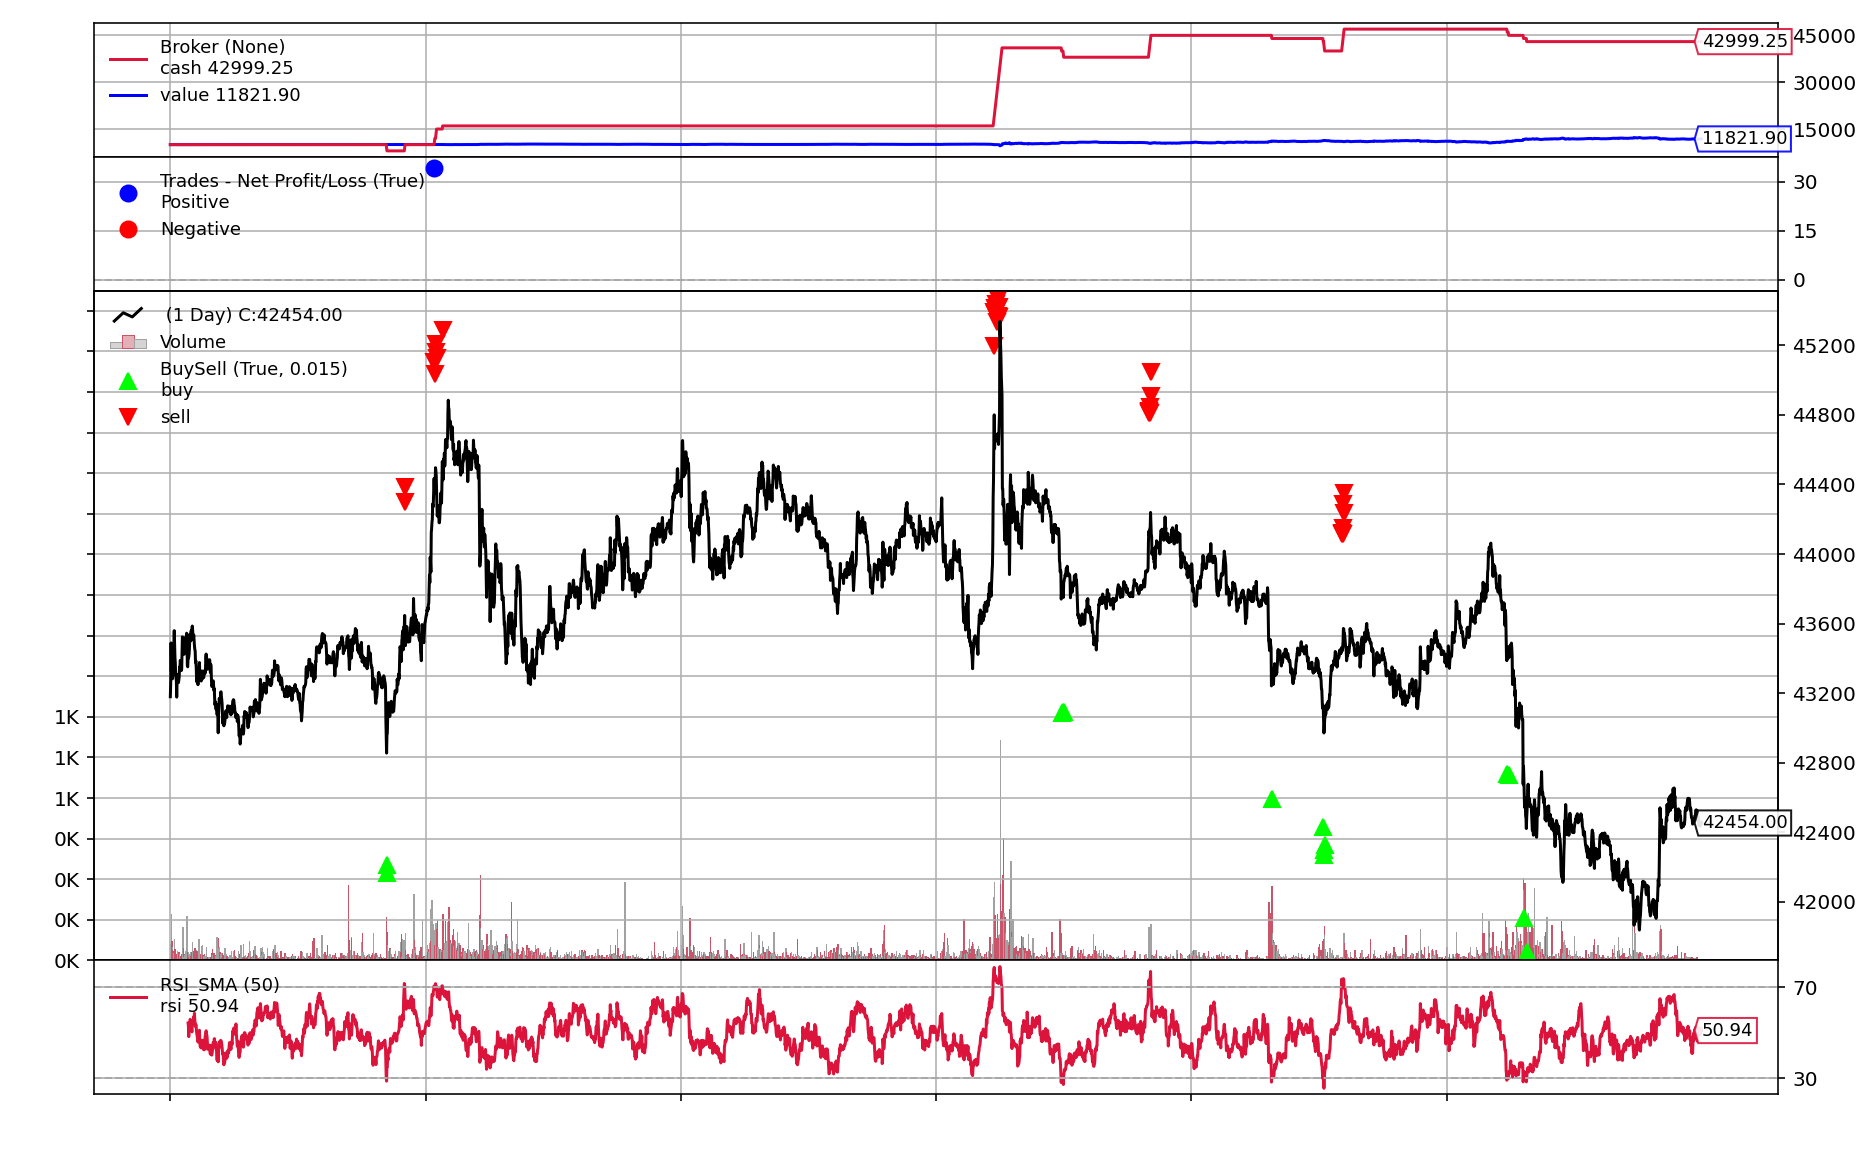

[[<Figure size 936x576 with 5 Axes>]]

In [330]:
plt.rcParams['figure.figsize'] = [13, 8]
cerebro.plot()

# <font size="5">Part 3: Execution Analysis.</font>

In [331]:
y=back[0].analyzers.trans.get_analysis()
y

OrderedDict([(datetime.datetime(2022, 3, 1, 10, 10),
              [[0.02329053852150264, 42935.89, 0, '', -999.9999999999999]]),
             (datetime.datetime(2022, 3, 1, 10, 11),
              [[0.023334020909149458, 42855.89, 0, '', -1000.0002333402091]]),
             (datetime.datetime(2022, 3, 1, 11, 1),
              [[-0.02294516839000178, 43582.16, 0, '', 1000.0]]),
             (datetime.datetime(2022, 3, 1, 11, 2),
              [[-0.022911076841231507, 43647.0, 0, '', 999.9997708892316]]),
             (datetime.datetime(2022, 3, 1, 12, 25),
              [[-0.02250511653824497, 44434.34, 0, '', 1000.0]]),
             (datetime.datetime(2022, 3, 1, 12, 26),
              [[-0.022537557713050917, 44370.38, 0, '', 1000.0000000000001]]),
             (datetime.datetime(2022, 3, 1, 12, 29),
              [[-0.02247385447954486, 44496.15, 0, '', 1000.0000000000001]]),
             (datetime.datetime(2022, 3, 1, 12, 30),
              [[-0.022482438966922935, 44479.16, 0, '', 

In [332]:
x=(back[0].analyzers.trades.get_analysis())
x

AutoOrderedDict([('total',
                  AutoOrderedDict([('total', 2), ('open', 1), ('closed', 1)])),
                 ('streak',
                  AutoOrderedDict([('won',
                                    AutoOrderedDict([('current', 1),
                                                     ('longest', 1)])),
                                   ('lost',
                                    AutoOrderedDict([('current', 0),
                                                     ('longest', 0)]))])),
                 ('pnl',
                  AutoOrderedDict([('gross',
                                    AutoOrderedDict([('total',
                                                      34.139071912825706),
                                                     ('average',
                                                      34.139071912825706)])),
                                   ('net',
                                    AutoOrderedDict([('total',
                                    

In [333]:
type(x)

backtrader.utils.autodict.AutoOrderedDict

In [334]:
x['pnl']['gross']['total']

34.139071912825706

In [335]:
x['pnl']['net']['total']

34.139071912825706

In [336]:
x['won']['pnl']['total']

34.139071912825706

In [337]:
x['lost']['pnl']['total']

0.0

In [338]:
len(y)

61